# Pridiction heart disease with machine learning (classification)
In this ptoject we will create a model with machine learning (classification) to predict if the person has a heart disease or not based on there history records

So we will use the following approach :
* 1.Problem definition
* 2.Data
* 3.Evaluation
* 4.Features
* 5.modelling
* 6.Experimentation



## Problem definition

>As we mentioned above, we will create a model to predict if whether or not the patient has a heart disease?



## Data

>The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.


# Evaluation

>During the proof of concept phase, our goal is to develop a model that achieves at least +80% accuracy in predicting whether a patient has heart disease **(Because we have only 300 rows in this data)**. If this performance benchmark is met, we will proceed with the full implementation of the project.
 

## Features

This is where you will get the information of every feature in the data set

**Data dectionary**

* 1. id: A unique number for each patient.
* 2. age: The patient's age in years.
* 3. origin: The place where the data was collected.
* 4. sex: The patient's gender (Male or Female).
* 5. cp: Type of chest pain the patient has:
        - (0) Typical angina: Pain in the chest when your heart isn't getting enough oxygen. This often happens during exercise or stress and goes away               resting.
        - (1) Atypical angina: Similar to typical angina, but the pain might not be the same or might occur even without exercise or stress. The pain can             be unusual.
        - (2) Non-anginal pain: This is chest pain that isn’t related to heart problems. It could be due to other causes like digestive issues or muscle              pain.
        - (3) No symptoms: Some people with heart disease may not feel any chest pain at all. This means they might have no symptoms, even if there's a               heart problem.

* 6. trestbps: The patient's resting blood pressure in mm Hg.
* 7. chol: The patient's cholesterol level (mg/dl).
* 8. fbs: Is the fasting blood sugar higher than 120? (True/False).
* 9. restecg: ECG results showing heart condition:
        - (0) Normal: The data indicates that the heart activity is within normal limits, with no signs of abnormalities.
        - (1) ST-T abnormality: This means there is an irregularity in the ST segment or T wave of the ECG, which could indicate heart problems like                  ischemia or a previous heart attack.
        - (2) LV hypertrophy: This stands for left ventricular hypertrophy, which means the wall of the heart's left ventricle is thickened, often due to high blood pressure or other conditions that strain the heart.
* 10. thalach: The highest heart rate the patient achieved.
* 11. exang: Did the patient have angina (chest pain) during exercise? (True/False).
* 12. oldpeak: A measure of ST depression during exercise.
* 13. slope: The slope of the ST segment during exercise:
        - (0) Upsloping: The ST segment goes upward, usually not a major concern but can indicate early signs of heart issues.
        - (1) Flat: The ST segment is level, which can sometimes suggest a problem but isn’t as severe as others.
        - (2) Downsloping: The ST segment goes downward, often indicating serious heart problems like insufficient blood flow to the heart muscle.
* 14. ca: The number of major blood vessels seen in an X-ray (0 to 4).
* 15. thal: A test result for heart condition:
        - (0) No thalassemia or no defect detected.
        - (1) Fixed defect : This could mean damage to the heart muscle that does not change with activity, possibly due to a prior heart attack .
        - (2) Reversible defect : Indicates a region of the heart muscle not receiving enough blood flow during stress but recovering at rest (often due to           ischemia).
        - (3) Severe or abnormal condition – May represent other more severe abnormal test results.
* 16. target: The final diagnosis (does the patient have heart disease?).
 




---

## Here we are going to prepare the tools

We are going to use Pandas, Matplotlib and NumPy for data analysis and manipulation.

In [1]:
# Import all the tools that we need

#Regular EDA and ploting libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import models from scikit-learn (Classifications models)

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

# Model evaluations

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.metrics import RocCurveDisplay

## Importing our data

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-dataset/heart.csv


In [3]:
df = pd.read_csv('/kaggle/input/heart-disease-dataset/heart.csv')
df.shape

(1025, 14)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [6]:
# Here, we will examine the number of unique classes in the target column.

df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [7]:
# Now, we will check for missing values and duplicate entries in the dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.duplicated().sum()

723

In [10]:
# As we can see, there are 723 duplicate entries, which we will remove.

df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


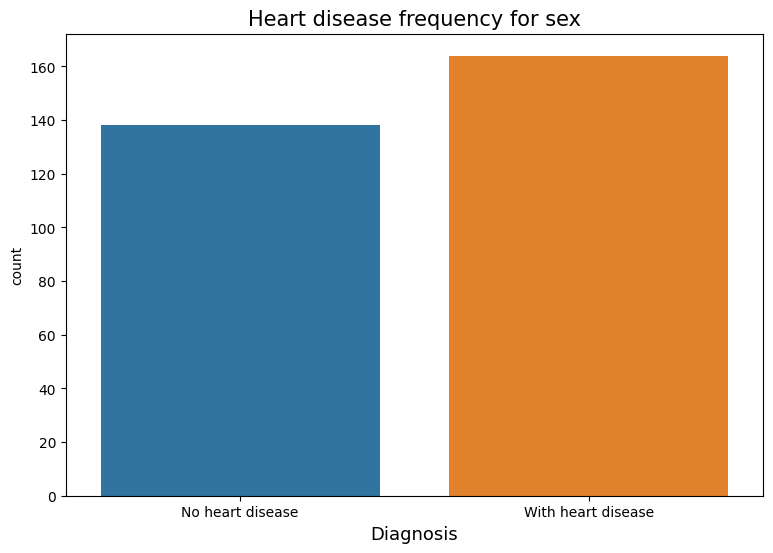

In [12]:
# We need to analyze the distribution of individuals with and without heart disease.

plt.figure(figsize=(9,6))
sns.countplot(data=df, x='target',)
plt.title('Heart disease frequency for sex', fontsize=15)
plt.xlabel('Diagnosis', fontsize=13)
plt.xticks(ticks=[0,1], labels=['No heart disease', 'With heart disease'])
plt.show()

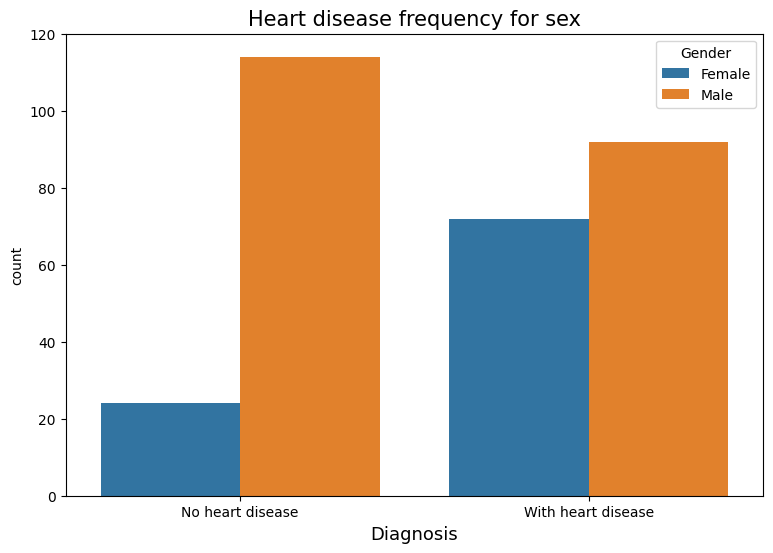

In [13]:
# We want to analyze the target class distribution based on gender.

plt.figure(figsize=(9,6))
sns.countplot(data=df, x='target', hue='sex')
plt.title('Heart disease frequency for sex', fontsize=15)
plt.xlabel('Diagnosis', fontsize=13)
plt.xticks(ticks=[0,1], labels=['No heart disease', 'With heart disease'])
plt.ylim((0,120))
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

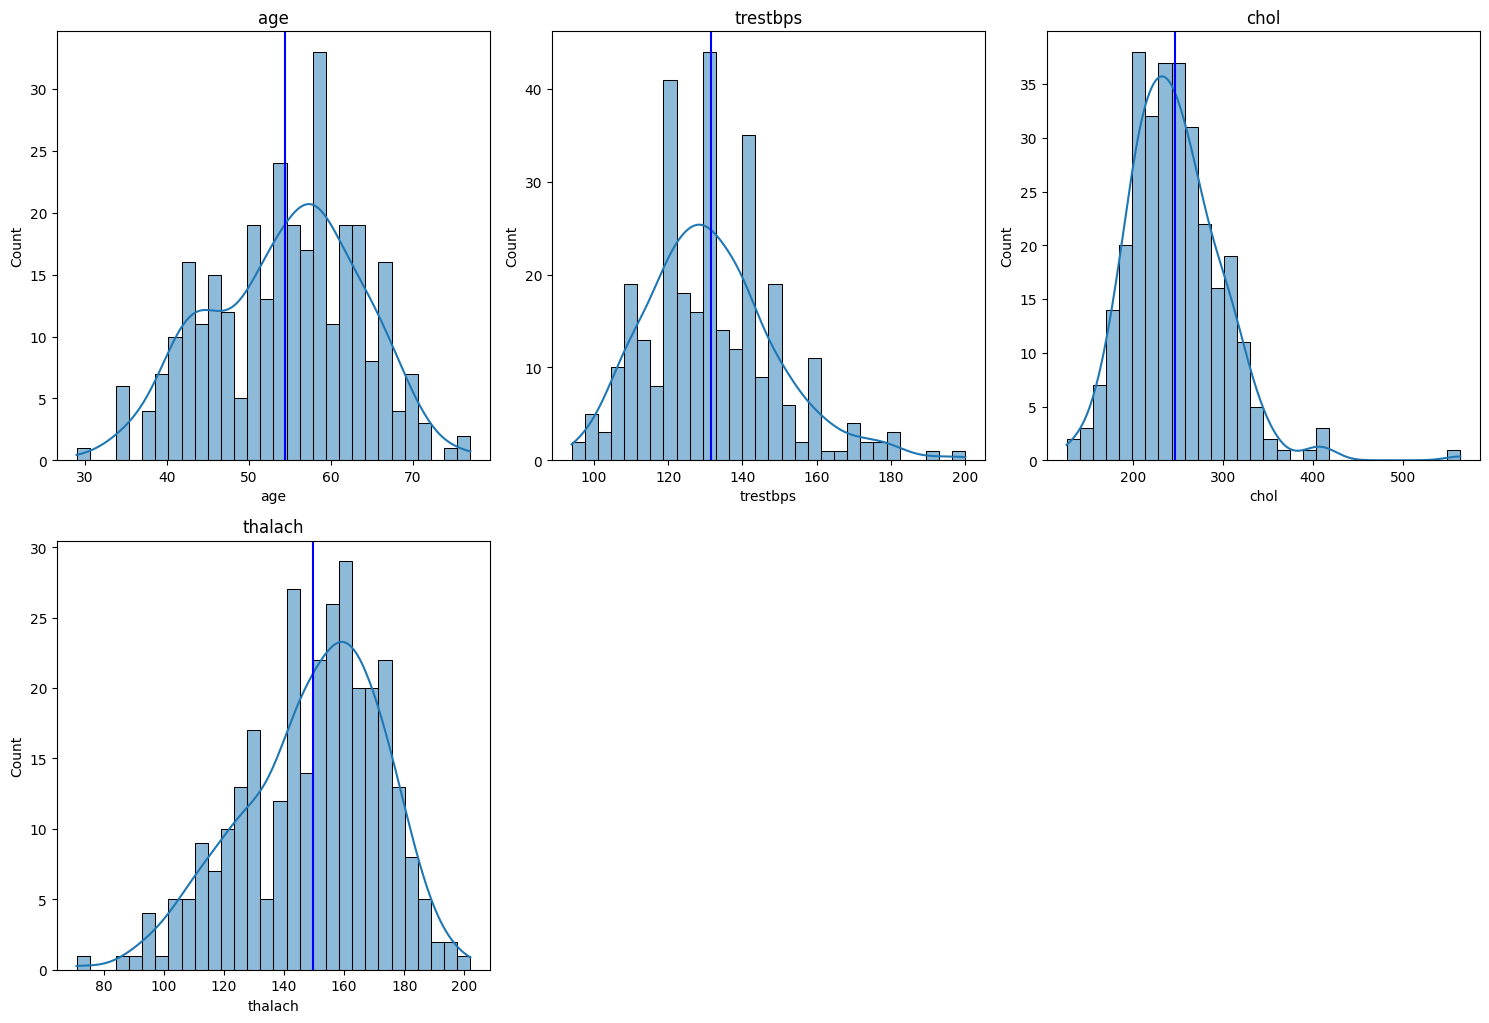

In [14]:
# Now, let's examine the distribution of each column.

col = ['age', 'trestbps', 'chol', 'thalach']
row = (len(col) //3) + 2

plt.figure(figsize=(15,5 * row))
for i, features in enumerate(col):
    plt.subplot(row, 3, i+1)
    sns.histplot(data=df, x= features, bins=30, kde=True)
    plt.axvline(df[features].mean(), color='blue')
    plt.title(features);
plt.tight_layout()

In [15]:
df.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0


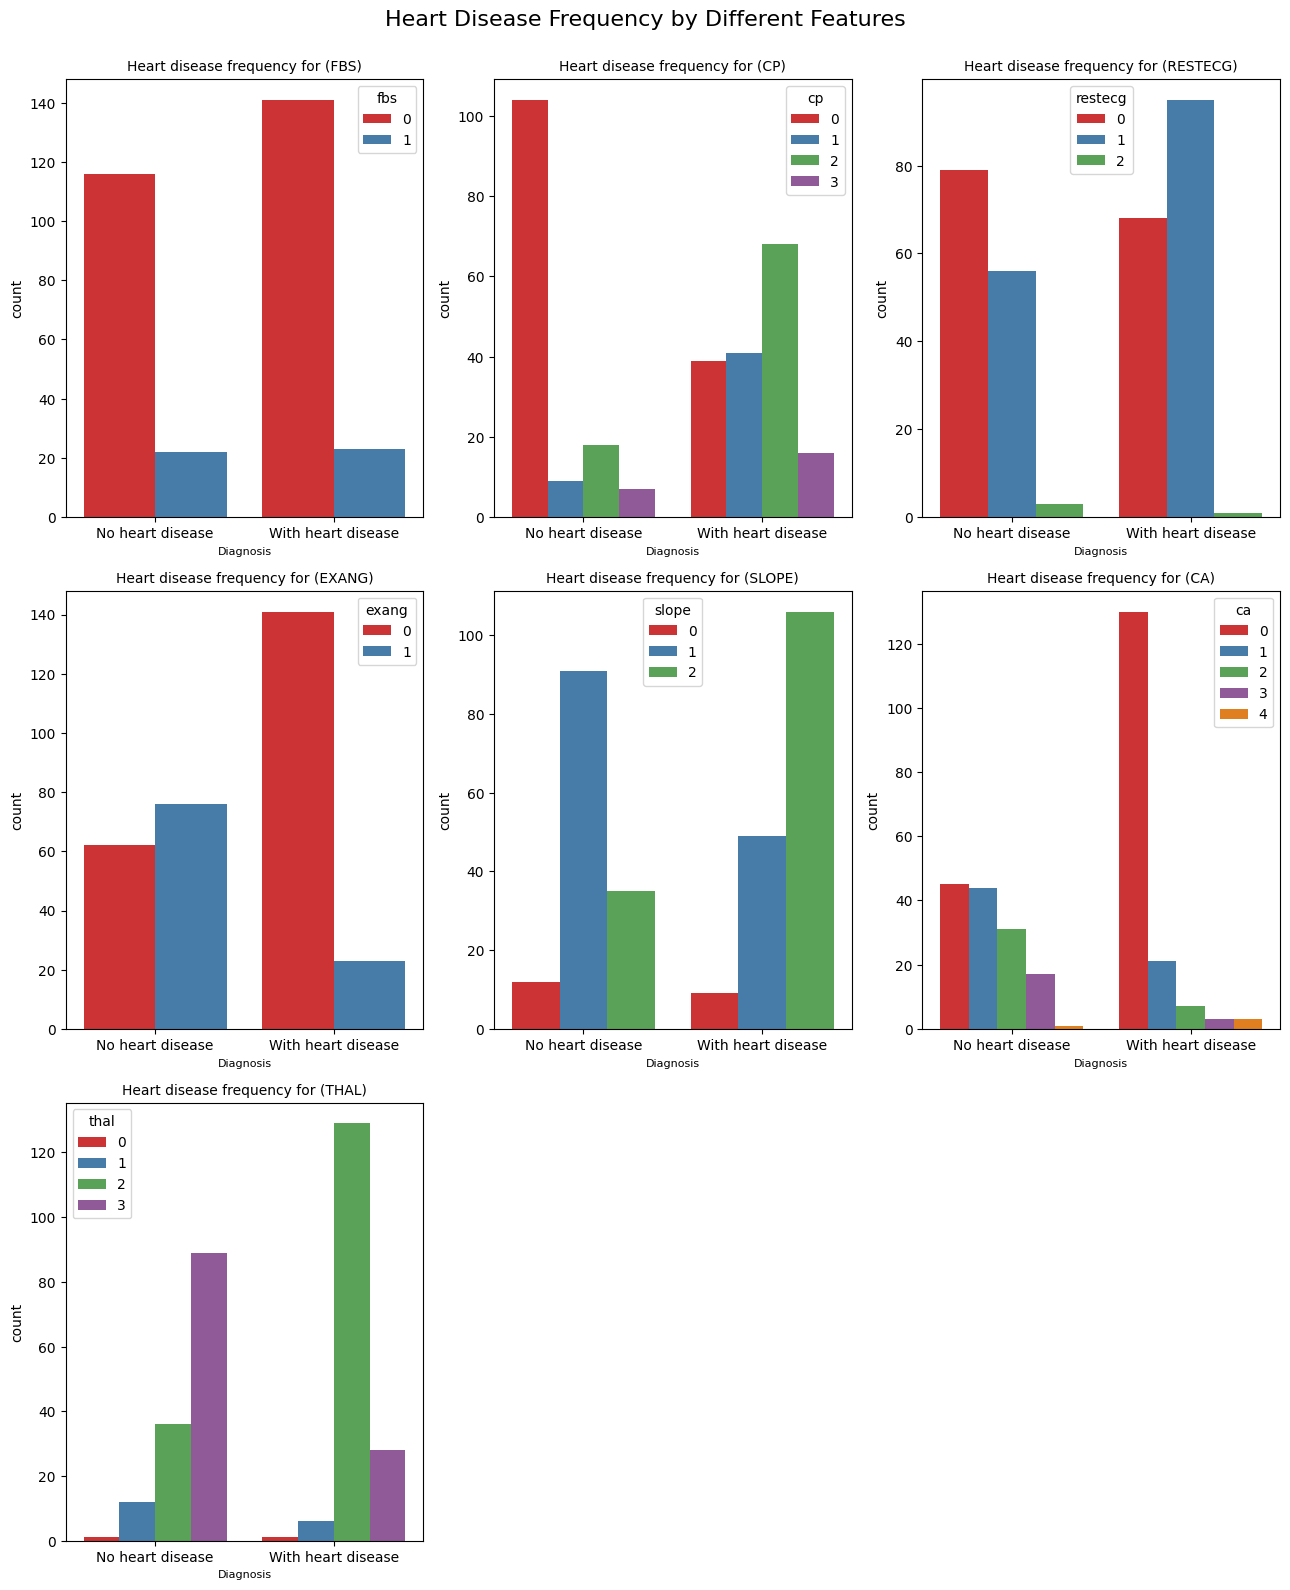

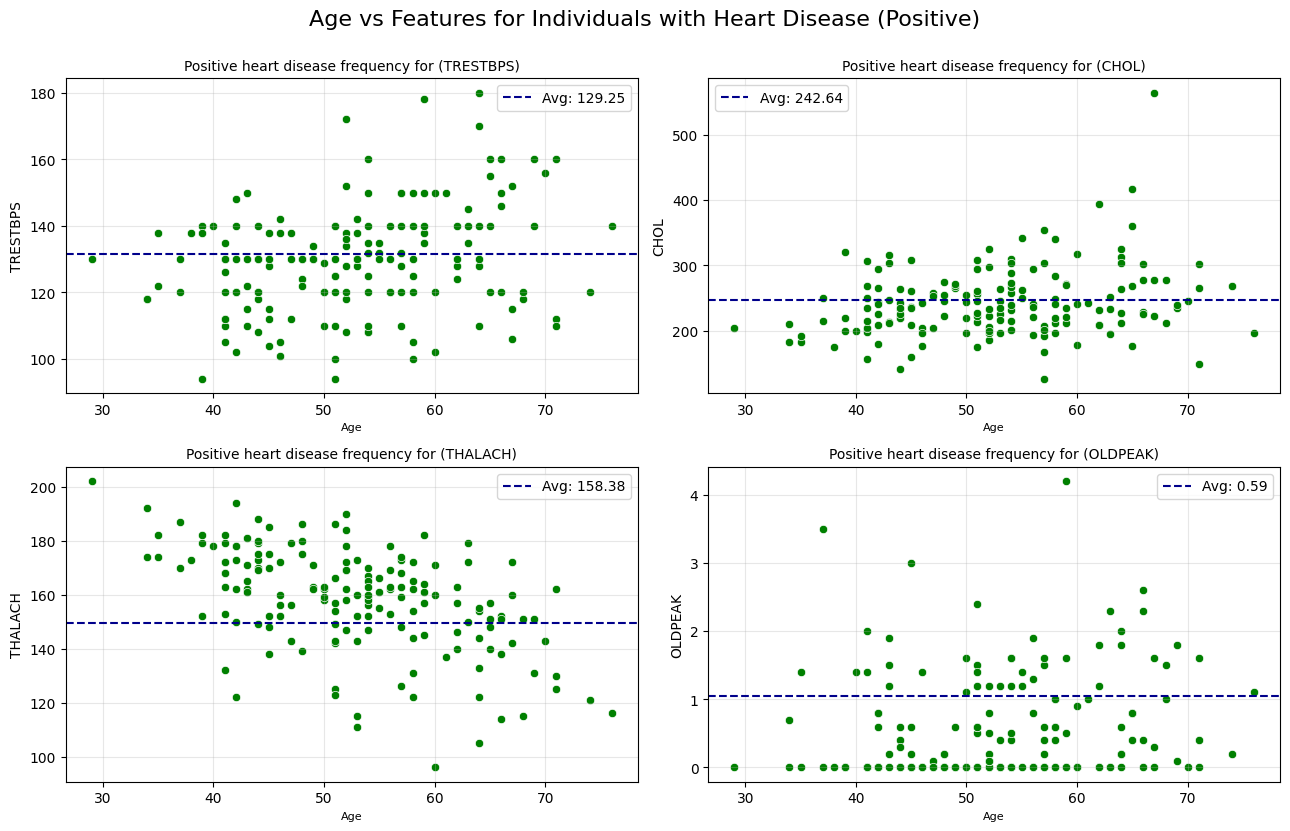

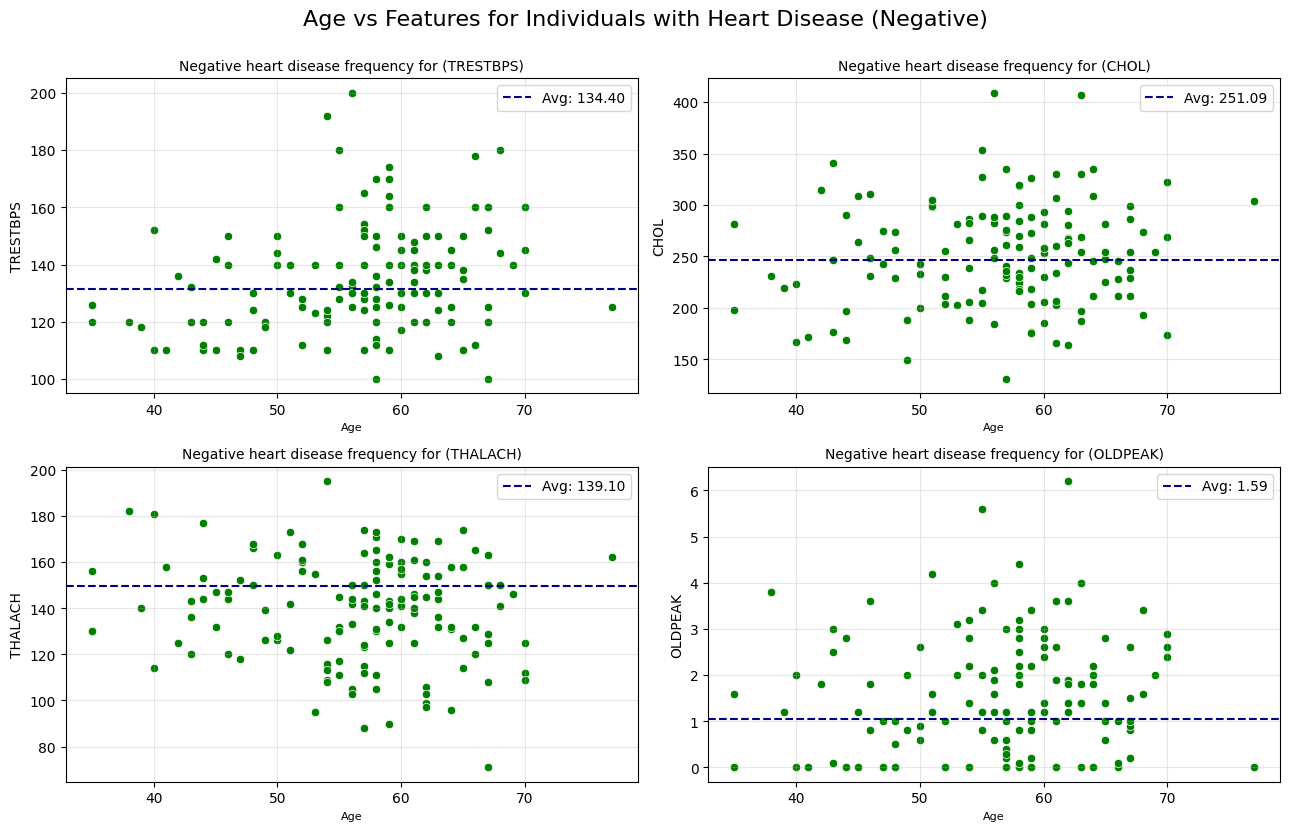

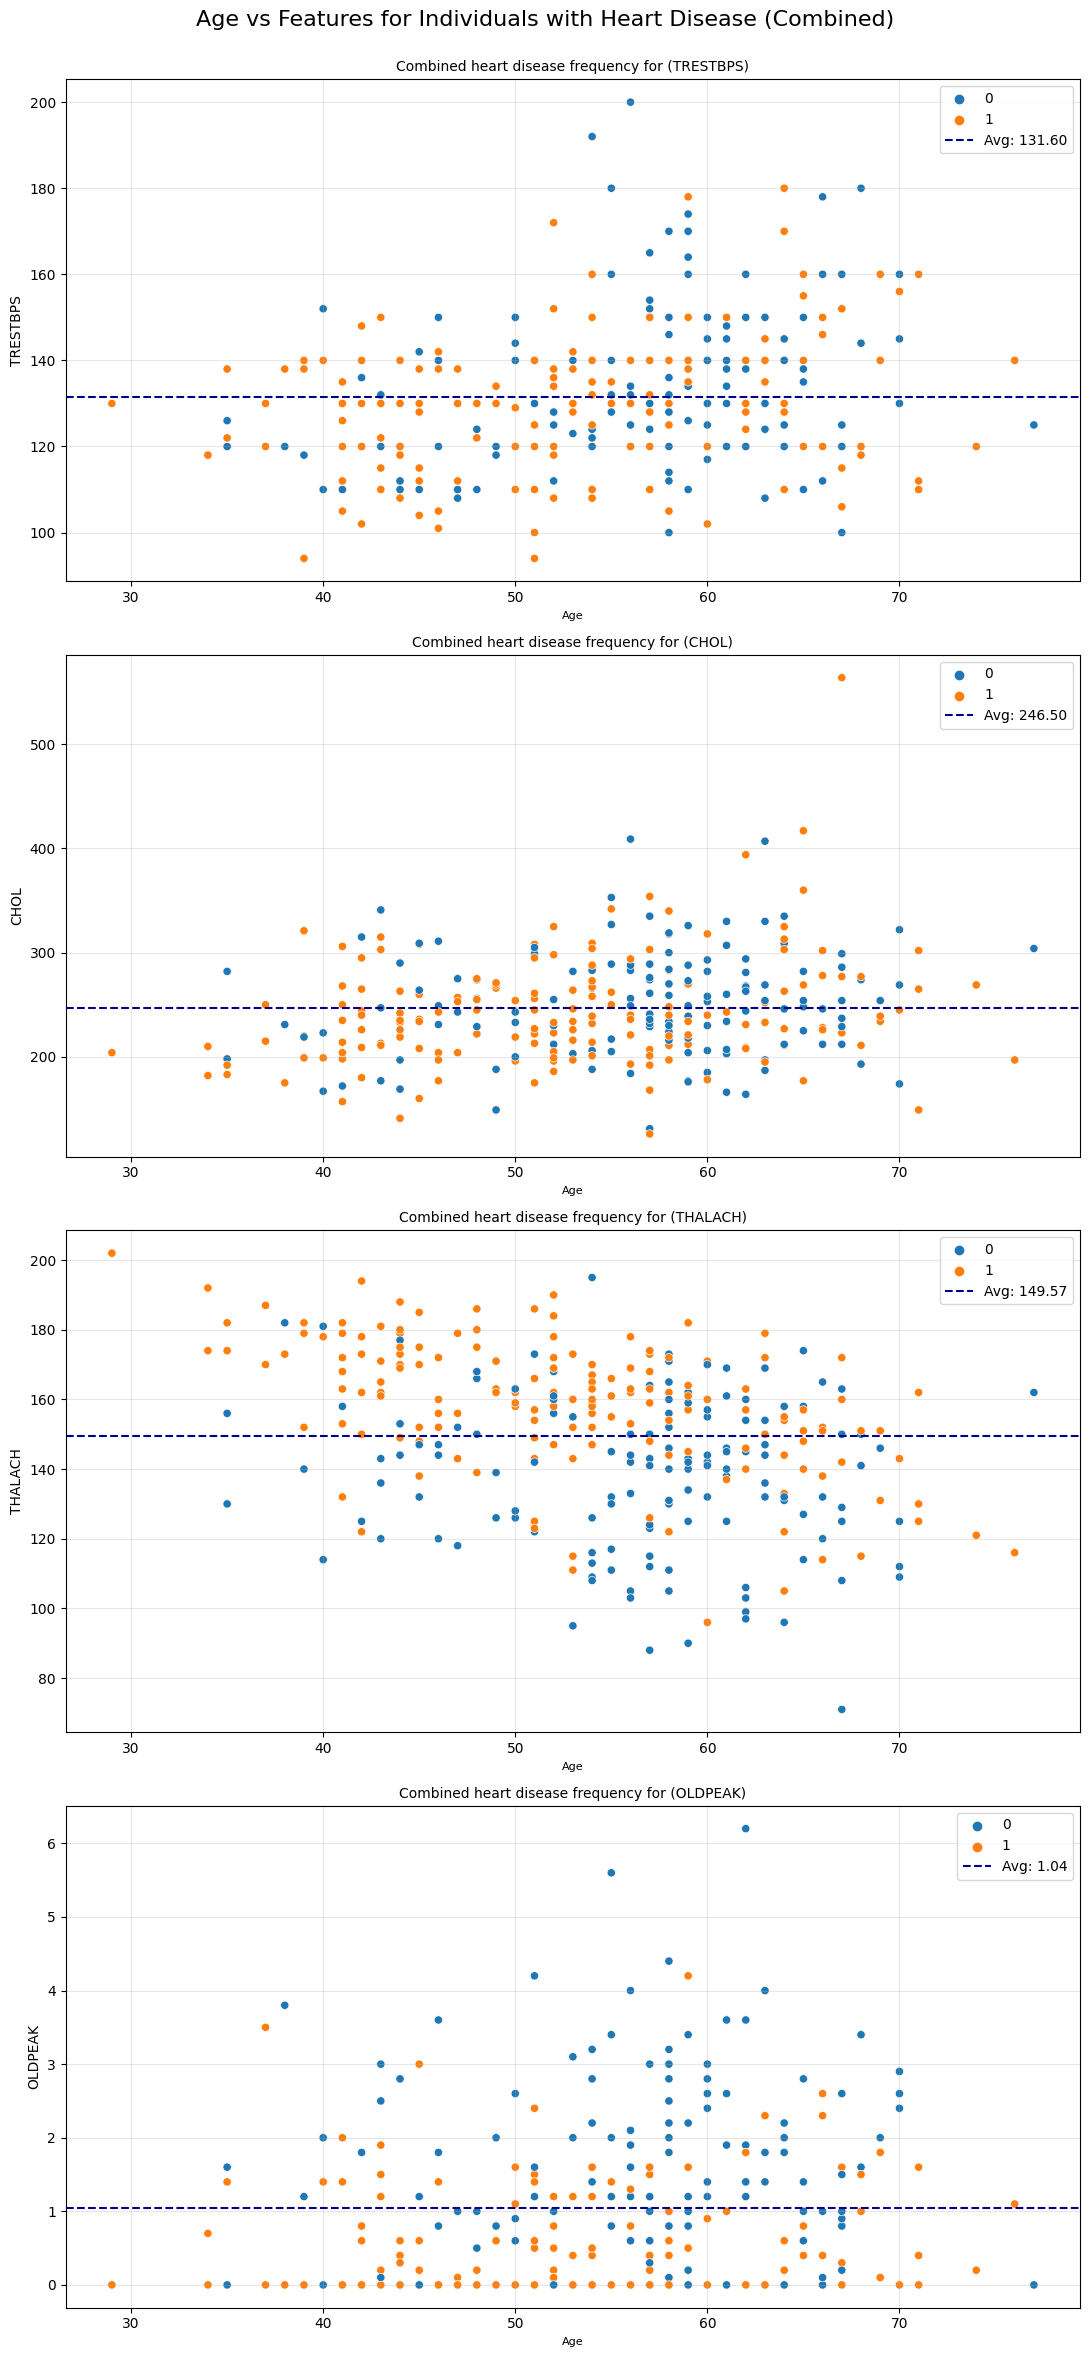

In [16]:
bar_list = ['fbs','cp', 'restecg', 'exang', 'slope', 'ca', 'thal', ]
bar_rows = len(bar_list)// 3 +2
def bar_columns(data):
    plt.figure(figsize=(13, 3 *len(bar_list)))
    for i ,columns in enumerate(bar_list):
        plt.subplot(bar_rows, 3,i+1)
        sns.countplot(data = data, x= 'target', hue = columns, palette='Set1')
        plt.title(f'Heart disease frequency for ({columns.upper()})', fontsize=10)
        plt.xlabel('Diagnosis', fontsize=8)
        plt.xticks(ticks=[0,1], labels=['No heart disease', 'With heart disease'])

        plt.suptitle('Heart Disease Frequency by Different Features', fontsize=16)
        plt.subplots_adjust(top=5)
    plt.tight_layout(rect=[0, 0, 1, 0.98])


# We will make 3 different scatters, one for the individual who has heart disease and the other who don't and one who combines them together.

scat_list = ['trestbps', 'chol', 'thalach', 'oldpeak']
scatter_rows = len(scat_list) // 3 +2


# Positive

def scatter_columns_positive(data):
    plt.figure(figsize=(13, 3 *len(scat_list)))
    for i ,column in enumerate(scat_list):
        plt.subplot(scatter_rows, 2,i+1)
        sns.scatterplot(data = data, x= 'age', y = df[column][df.target == 1], color='green')
        plt.title(f'Positive heart disease frequency for ({column.upper()})', fontsize=10)
        plt.suptitle('Age vs Features for Individuals with Heart Disease (Positive)', fontsize=16)
        plt.axhline(df[column].mean(), ls='--', label=f'Avg: {df[column][df.target == 1].mean():.2f}', color='darkblue')
        plt.xlabel('Age', fontsize=8)
        plt.ylabel(column.upper())
        plt.grid(alpha=0.3)
        plt.legend()
    plt.tight_layout(rect=[0, 0, 1, 0.98])


# Negative

def scatter_columns_negative(data):
    plt.figure(figsize=(13, 3 * len(scat_list)))
    for i ,column in enumerate(scat_list):
        plt.subplot(scatter_rows, 2,i+1)
        sns.scatterplot(data = data, x= 'age', y = df[column][df.target == 0], color='green')
        plt.title(f'Negative heart disease frequency for ({column.upper()})', fontsize=10)
        plt.suptitle('Age vs Features for Individuals with Heart Disease (Negative)', fontsize=16)
        plt.axhline(df[column].mean(), ls='--', label=f'Avg: {df[column][df.target == 0].mean():.2f}', color='darkblue')
        plt.xlabel('Age', fontsize=8)
        plt.ylabel(column.upper())
        plt.grid(alpha=0.3)
        plt.legend()
    plt.tight_layout(rect=[0, 0, 1, 0.98])

# combined

def scatter_columns_combined(data):
    plt.figure(figsize=(11, 6 * len(scat_list)))
    for i ,column in enumerate(scat_list):
        plt.subplot(4, 1,i+1)
        sns.scatterplot(data = data, x= 'age', y = column, hue='target')
        plt.title(f'Combined heart disease frequency for ({column.upper()})', fontsize=10)
        plt.suptitle('Age vs Features for Individuals with Heart Disease (Combined)', fontsize=16)
        plt.axhline(df[column].mean(), ls='--', label=f'Avg: {df[column].mean():.2f}', color='darkblue')
        plt.xlabel('Age', fontsize=8)
        plt.ylabel(column.upper())
        plt.grid(alpha=0.3)
        plt.legend()
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    


bar_columns(data=df)
scatter_columns_positive(data=df)
scatter_columns_negative(data=df)
scatter_columns_combined(data=df)

<Axes: >

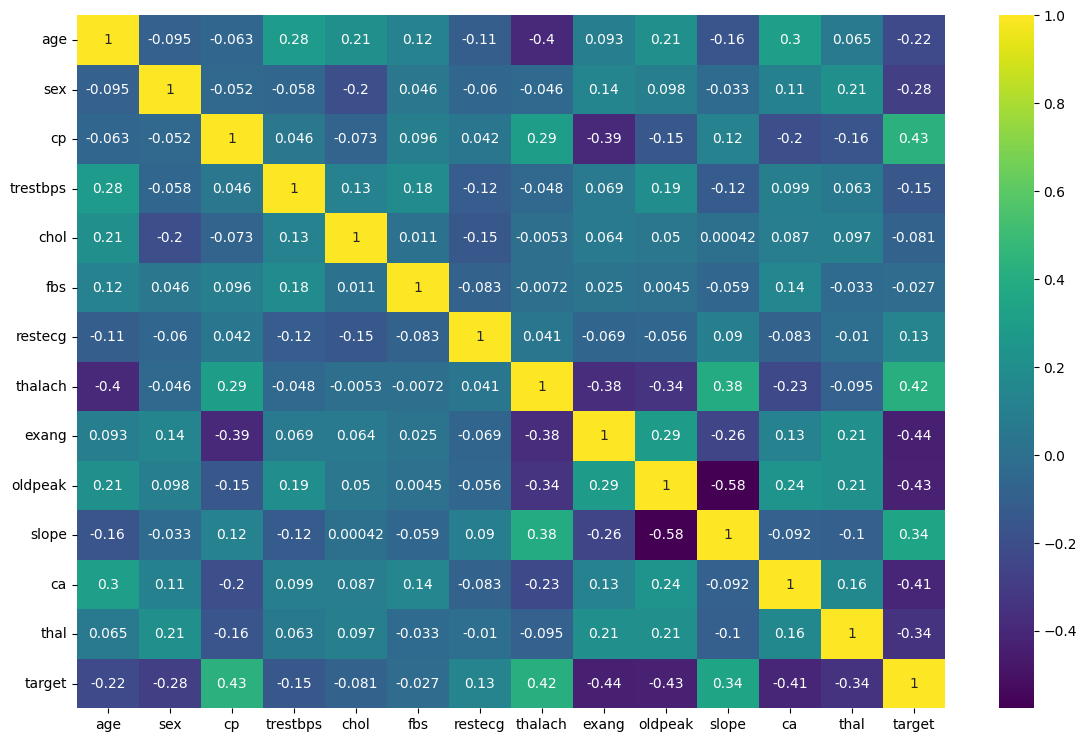

In [17]:
# We want to visualize the correlation matrix for all numerical columns in the dataset.

# First, we will use a heatmap to visualize the correlation among all the columns.

col_corr = df.corr()
plt.figure(figsize=(14,9))
sns.heatmap(col_corr, cmap='viridis', annot=True)

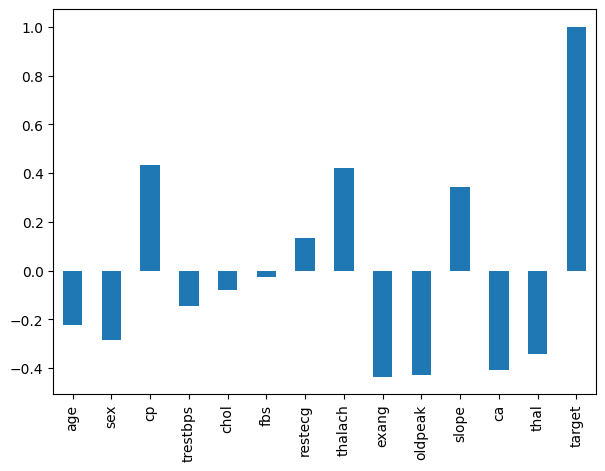

In [18]:
# Correlation of Features

df_corr = df.corr()['target']
df_corr.plot(kind='bar',figsize=(7,5))
plt.show()

# Modelling

After gaining valuable insights from the data, we will proceed with the modeling phase.

In [19]:
# Splitting the Data
np.random.seed(42)

x = df.drop('target', axis=1)
y = df['target']

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

# we are going to use 4 different types of models

- LinearSVC
- Random Forest Classifier
- Logestic Regression
- K-Neighbors Classifier

In [20]:
# First, we will create a dictionary to store our models.

np.random.seed(42)

models = {'LinearSVC': LinearSVC(),
         'Random Forest Classifier': RandomForestClassifier(),
         'Logestic Regression': LogisticRegression(),
         'KNN': KNeighborsClassifier()}

# and we will create a simple function to fit and score the models.

def fit_score_models(models, x_train,x_test,y_train,y_test):
    m_scores={}
    for name,model in models.items():
        model.fit(x_train,y_train)
        model_score=model.score(x_test,y_test)
        m_scores[name] = model_score
    return m_scores

In [21]:
scores = fit_score_models(models, x_train,x_test,y_train,y_test)
scores

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LinearSVC': 0.7704918032786885,
 'Random Forest Classifier': 0.819672131147541,
 'Logestic Regression': 0.8032786885245902,
 'KNN': 0.639344262295082}

(0.0, 1.0)

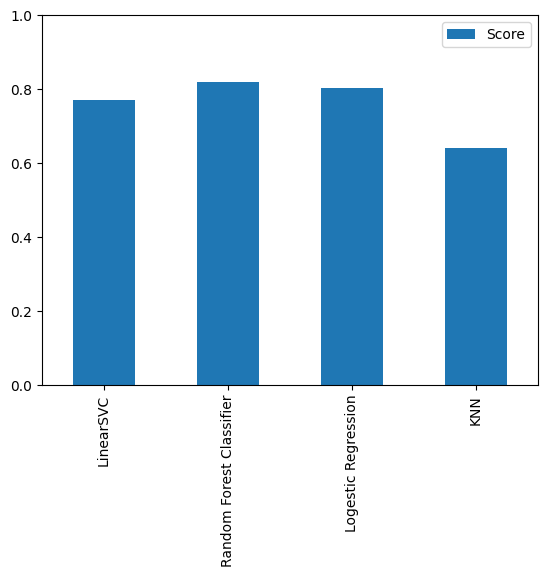

In [22]:
scores_compared = pd.DataFrame(scores, index=['Score'])
scores_compared.T.plot(kind='bar')
plt.ylim(0,1)

As observed, these are the baseline scores for the models. In the next step, we will focus on the following aspects to further evaluate and improve the models:

* Hyperparameter Tuning
* Features Importance
* Confusion Matrix 
* Cross-Validation
* Precision
* Recall
* F1 score
* Classification score
* ROC
* Area Under The Curve (AUC)

### Hyperparameter Tuning

The maximum score for KNN achieved is 67.21%


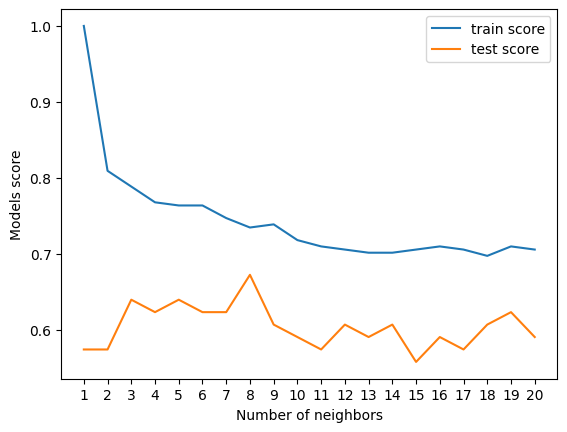

In [23]:
#Let's proceed with tuning the KNN Classifier.

train_score = []
test_score = []

neighbors = range(1,21)

KNN = KNeighborsClassifier()

for i in neighbors:
    KNN.set_params(n_neighbors=i)
    KNN.fit(x_train,y_train)
    train_score.append(KNN.score(x_train,y_train))
    test_score.append(KNN.score(x_test,y_test))

plt.plot(neighbors,train_score, label='train score')
plt.plot(neighbors,test_score, label='test score')
plt.xlabel('Number of neighbors')
plt.ylabel('Models score')
plt.xticks(np.arange(1,21))
plt.legend()
print(f'The maximum score for KNN achieved is {max(test_score) * 100:.2f}%')

"I manually tuned the **KNN model** using only `n_neighbors` to check for potential improvements. However, with an accuracy of **67.21%**, it still performs significantly worse compared to other models. Therefore, we will **exclude** the KNN model from further analysis."

---

## Hyperparameter tuning with RandomizedSearchCV

In [24]:
np.random.seed(42)
log_grid = {
    'C': np.logspace(-4, 4, 20), 
    'solver': ['liblinear'],
    'max_iter': [100, 200,500]
}

rf_param = {
    'n_estimators': [50, 100, 150, 200, 300],  
    'max_depth': [None, 3, 5, 7, 10, 20],  
    'min_samples_split': [2, 5, 10, 20],  
    'min_samples_leaf': [1, 2, 5, 10]  
}


svc_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'loss': ['hinge', 'squared_hinge'],
    'tol': [1e-4, 1e-5],
    'max_iter': [1000, 2000]
}

log_reg = LogisticRegression()
log_search_cv = RandomizedSearchCV(log_reg, log_grid, n_iter=20, cv=5,n_jobs=-1)
log_search_cv.fit(x_train,y_train)

lr_best_param = log_search_cv.best_params_
lr_best_score = log_search_cv.best_score_

rf_clf = RandomForestClassifier()
rf_search_cv = RandomizedSearchCV(rf_clf, rf_param, n_iter=20, cv=5, n_jobs=-1)
rf_search_cv.fit(x_train,y_train)

rf_best_param = rf_search_cv.best_params_
rf_best_score = rf_search_cv.best_score_

svc_clf = LinearSVC()
linear_search_cv = RandomizedSearchCV(svc_clf, svc_grid, n_iter=20, cv=5, n_jobs=-1)
linear_search_cv.fit(x_train,y_train)
linear_best_param = linear_search_cv.best_params_
linear_best_score = linear_search_cv.best_score_

print(f'The linearsvc best score is: {linear_best_score *100:.2f}%')
print(f'The random forest best score is: {rf_best_score *100:.2f}%')
print(f'The logistic regression best score is: {lr_best_score *100:.2f}%')

The linearsvc best score is: 80.92%
The random forest best score is: 83.02%
The logistic regression best score is: 84.22%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


---

 As you can see, we have used **RandomizedCVSearch**, and while some models improved, others worsened. Now, we will give it one more try, but this time with **GridSearchCV**.

# Hyperparameter our models using **GridSearchCV**

In [25]:
np.random.seed(42)

log_grid = {
    'C': np.logspace(-4, 4, 30), 
    'solver': ['liblinear'],
    'max_iter': [100, 200,300]
}

rf_param = {
    'n_estimators': [50, 100, 150, 200, 300],  
    'max_depth': [None, 3, 5, 7, 10, 20],  
    'min_samples_split': [2, 5, 10, 20],  
    'min_samples_leaf': [1, 2, 5, 10]  
}



svc_grid = {
    'C': [0.01, 0.1, 1, 10],
    'loss': ['hinge', 'squared_hinge'],
    'tol': [1e-4, 1e-5],
    'max_iter': [1000, 2000]
}



log_grid_search = GridSearchCV(LogisticRegression(), log_grid, cv=5, n_jobs=-1)
log_grid_search.fit(x_train,y_train)

log_grid_best_param = log_grid_search.best_params_
log_grid_best_score = log_grid_search.best_score_



rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_param, cv=5, n_jobs=-1)
rf_grid_search.fit(x_train,y_train)

rf_grid_best_param = rf_grid_search.best_params_
rf_grid_best_score = rf_grid_search.best_score_


linear_grid_search = GridSearchCV(LinearSVC(), svc_grid, cv=5, n_jobs=-1)
linear_grid_search.fit(x_train,y_train)

linear_grid_best_param = linear_grid_search.best_params_
linear_grid_best_score = linear_grid_search.best_score_


print(f'The random forest best score is: {rf_grid_best_score *100:.2f}%')
print(f'The linearsvc best score is: {linear_grid_best_score *100:.2f}%')
print(f'The logistic regression best score is: {log_grid_best_score *100:.2f}%')

The random forest best score is: 84.66%
The linearsvc best score is: 81.74%
The logistic regression best score is: 84.22%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [26]:
print('RandomizeSearchCV')
print(f'The linearsvc best score is: {linear_best_score *100:.2f}%')
print(f'The random forest best score is: {rf_best_score *100:.2f}%')
print(f'The logistic regression best score is: {lr_best_score *100:.2f}%')
print('*********************************************************************')
print('GridSearchCV')
print(f'The linearsvc best score is: {linear_grid_best_score *100:.2f}%')
print(f'The random forest best score is: {rf_grid_best_score *100:.2f}%')
print(f'The logistic regression best score is: {log_grid_best_score *100:.2f}%')

RandomizeSearchCV
The linearsvc best score is: 80.92%
The random forest best score is: 83.02%
The logistic regression best score is: 84.22%
*********************************************************************
GridSearchCV
The linearsvc best score is: 81.74%
The random forest best score is: 84.66%
The logistic regression best score is: 84.22%


### Based on the results, we can see that two models performed well. However, I will proceed with the **RandomForestClassifier** for further analysis.

In [27]:
rf_grid_search.score(x_test,y_test)

0.819672131147541

## Evaluating our machine learning classifier model goes beyond just accuracy. We need to consider additional metrics like

* ROC curve
* AUC score
* Confusion matrix
* calssification report
* Precision
* Recall
* F1

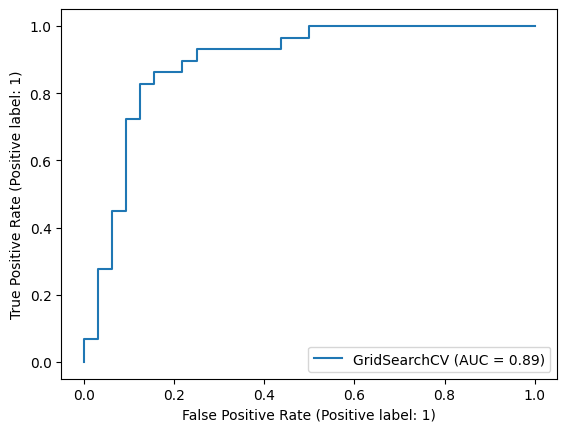

In [28]:
# we will start by make predictions

y_pred = rf_grid_search.predict(x_test)

#ROC curve and AUC score

RocCurveDisplay.from_estimator(rf_grid_search,x_test,y_test)
plt.show()

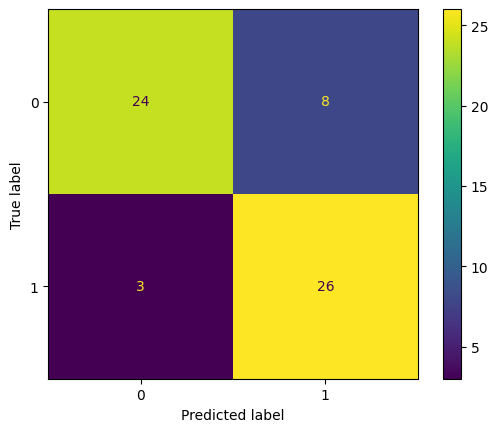

In [29]:
# Let's make a confusion matrix

ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.show()

In [30]:
# classification report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.75      0.81        32
           1       0.76      0.90      0.83        29

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



As you know, the classification report we generated was based on only 20% of our data, meaning it might not be fully accurate. To improve this, we will use **cross_val_score()** to evaluate the model's performance more reliably across multiple folds of the dataset.

In [31]:
rf_grid_search.best_params_

{'max_depth': 7,
 'min_samples_leaf': 2,
 'min_samples_split': 20,
 'n_estimators': 100}

In [32]:
# We will use our best parameters 


clf = RandomForestClassifier(n_estimators=50,max_depth=10,min_samples_leaf=5,min_samples_split=10)

scoring_names = ['accuracy', 'recall','f1','precision']
scoring_metrics = {}

for score in scoring_names:
    cvs = np.mean(cross_val_score(clf,x ,y , cv=5, scoring=score))
    scoring_metrics[score] = cvs
formatted_metrics = {key: f"{value * 100:.2f}%" for key, value in scoring_metrics.items()}
formatted_metrics

{'accuracy': '83.76%',
 'recall': '88.45%',
 'f1': '85.52%',
 'precision': '82.78%'}

In [33]:
# Define the classifier with the best parameters
np.random.seed(42)

clf = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_leaf=5, min_samples_split=10)

scoring_names = ['accuracy', 'recall', 'f1', 'precision']

cv_results = cross_validate(clf, x, y, cv=5, scoring=scoring_names)

scoring_metrics = {metric: np.mean(cv_results[f'test_{metric}']) for metric in scoring_names}

In [34]:
# Now, let's visualize our cross-validation metrics to better understand the model's performance.

cvm_metrics = pd.DataFrame(scoring_metrics.values(), 
                          index=scoring_metrics.keys(),
                               columns=['Scores'])

cvm_metrics

,Scores
accuracy,0.830984
recall,0.878409
f1,0.849707
precision,0.824083


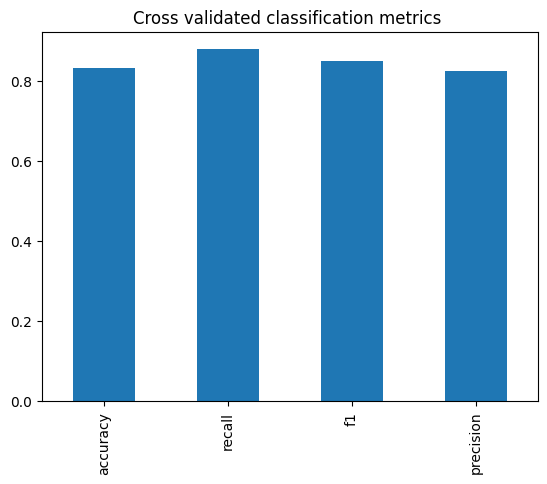

In [35]:
cvm_metrics.plot.bar(title='Cross validated classification metrics ', legend=False)
plt.show()

---

## Feature importance

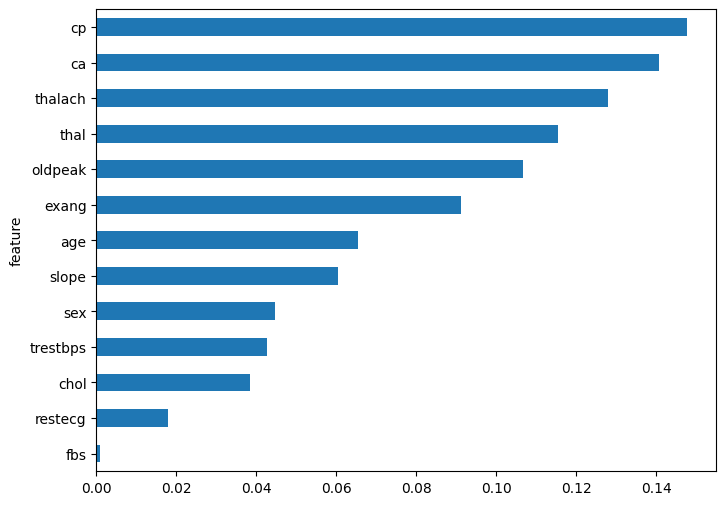

In [36]:
np.random.seed(42)

clf = RandomForestClassifier(n_estimators=50,max_depth=10,min_samples_leaf=5,min_samples_split=10)

clf.fit(x, y)

feature_importance = clf.feature_importances_

feature_name = x.columns

feature_importance_df = pd.DataFrame({'feature': feature_name,
                                     'importance': feature_importance})
feature_importance_df.sort_values(by='importance',ascending=True, inplace=True)

feature_importance_df.plot.barh(x = 'feature', y= 'importance',figsize=(8,6), legend=False)
plt.show()

# Conclusion
In this project, I started by cleaning and preprocessing the dataset, ensuring it was ready for model training. I experimented with four different classification models:

- **Random Forest Classifier**
- **Logistic Regression**
- **K-Nearest Neighbors Classifier**
- **Linear Support Vector Classifier (SVC)**


After evaluating their performance, the **Random Forest Classifier** and **Logistic Regression** emerged as the top-performing models. I ultimately proceeded with the **Random Forest Classifier**, which achieved an accuracy of **83.43%** and a recall of **87.36%** using **cross-validation** (CV=5). Given that the dataset consists of only 300 rows, this performance is quite strong.

Considering the current results, I have decided not to pursue further model modifications. The current approach balances accuracy and generalization well, and additional fine-tuning may yield only marginal improvements. Future work could involve collecting more data, trying feature engineering, or exploring ensemble methods for further optimization.